##**Assignment 1: Data Cleaning**

###**Dataset**

The dataset has been downloaded from Kaggle. It is related to New York Airbnb which is mostly used by the users to explore the world.

https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data

###**Import all the required libraries**

In [142]:
import pandas as pd
import numpy as np
from google.colab import files
import matplotlib.pyplot as plt
import io
import requests
%matplotlib inline
from matplotlib.colors import ListedColormap
from scipy import stats
from google.colab import drive

from mpl_toolkits.mplot3d import Axes3D

###**Load the data and look at the first few rows**

This is the dataset that includes all the needed information to find out more about hosts, geographical availability, necessary metrics to make predictions and draw conclusions.

Downloaded and uploaded the dataset on Google drive and reading it from the drive.

In [143]:
drive.mount('/content/drive/')
df_data = pd.read_csv('/content/drive/MyDrive/DataMining/Assignment1/AB_NYC_2019.csv')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


###**Data Preprocessing and Data Cleaning**

**Displaying top 10 rows in the dataset**

In [144]:
df_data.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188


**Displaying the dataframe information using info method**

In [145]:
df_data.info

<bound method DataFrame.info of              id  ... availability_365
0          2539  ...              365
1          2595  ...              355
2          3647  ...              365
3          3831  ...              194
4          5022  ...                0
...         ...  ...              ...
48890  36484665  ...                9
48891  36485057  ...               36
48892  36485431  ...               27
48893  36485609  ...                2
48894  36487245  ...               23

[48895 rows x 16 columns]>

**Finding the unique value count in each columns**

**For example, we see room_type has 3 unique values which are "Private Room", "Entire home/apt" and "Shared room"**

In [146]:
df_data.nunique()

id                                48895
name                              47905
host_id                           37457
host_name                         11452
neighbourhood_group                   5
neighbourhood                       221
latitude                          19048
longitude                         14718
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
last_review                        1764
reviews_per_month                   937
calculated_host_listings_count       47
availability_365                    366
dtype: int64

**Describing the mean, min and max values for the columns with number values**

In [147]:
df_data.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


**We have in total 48895 rows with 16 columns and once the dataset is cleaned and pre processed, the number of rows might get reduced or deleted**

In [148]:
df_data.count

<bound method DataFrame.count of              id  ... availability_365
0          2539  ...              365
1          2595  ...              355
2          3647  ...              365
3          3831  ...              194
4          5022  ...                0
...         ...  ...              ...
48890  36484665  ...                9
48891  36485057  ...               36
48892  36485431  ...               27
48893  36485609  ...                2
48894  36487245  ...               23

[48895 rows x 16 columns]>

###**Removing the rows with invalid values**

**Removing the rows with invalid property names : The property names must have atleast 5 characters.**

**Removing the rows with invalid host names : The host names must be atleast 3 characters long**

**We will notice that the number of rows get reduced to 48095 rows**

In [149]:
df1 = df_data.drop(df_data[(df_data['name']).str.len() < 5].index)
df2 = df1.drop(df1[(df1['host_name']).str.len() < 3].index)
df2.count

<bound method DataFrame.count of              id  ... availability_365
0          2539  ...              365
1          2595  ...              355
2          3647  ...              365
3          3831  ...              194
4          5022  ...                0
...         ...  ...              ...
48890  36484665  ...                9
48891  36485057  ...               36
48892  36485431  ...               27
48893  36485609  ...                2
48894  36487245  ...               23

[48095 rows x 16 columns]>

**The properties which have availablity 0 doesn't make any sense. Listing those values in the dataset might make the model complex, therefore, removing such rows is important**

**We will notice that the number of rows get reduced to 30802 rows**

In [150]:
df3=df2.drop(df2[(df2['availability_365']) == 0].index)
df3.count

<bound method DataFrame.count of              id  ... availability_365
0          2539  ...              365
1          2595  ...              355
2          3647  ...              365
3          3831  ...              194
5          5099  ...              129
...         ...  ...              ...
48890  36484665  ...                9
48891  36485057  ...               36
48892  36485431  ...               27
48893  36485609  ...                2
48894  36487245  ...               23

[30802 rows x 16 columns]>

###**Finding missing values in the datasets**

**Importing library to find the missing values in each column.**

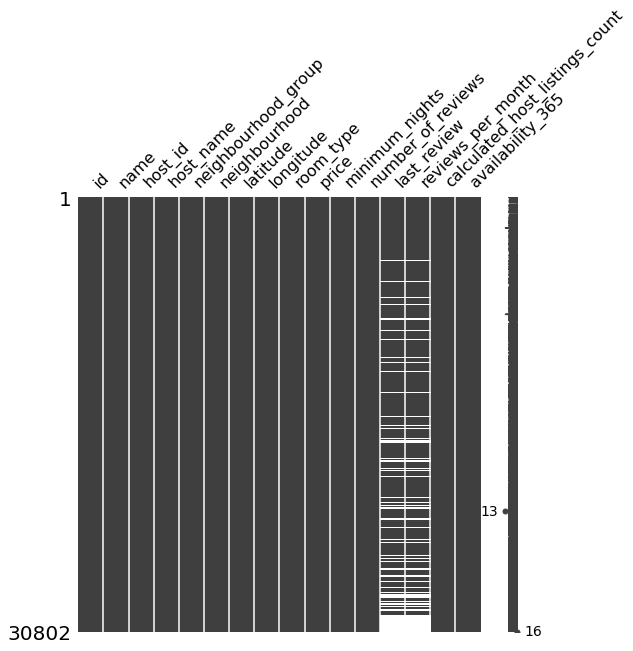

In [151]:
import missingno as msno
msno.matrix(df3,figsize=(8,8));

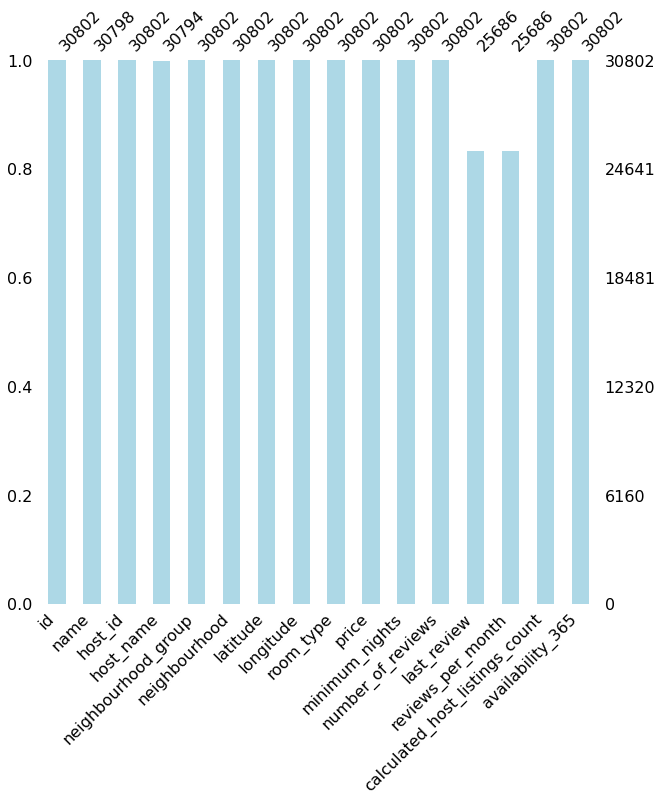

In [152]:
msno.bar(df3 ,figsize=(10, 10), color='LightBlue')

**We can see that there are two columns which has missing values as displayed in the above graph - "last_reviews" and "reviews_per_month". In our case, these two columns does not make any sense as we already have total number of reviews. They are not adding values to the dataset instead making it more complex and sparse due to null values. Therefore, in the next step, we will be removing these columns along with other features.**

###**Dimensionality Reduction is one of the main steps that is really important to eliminate redundancies, for better performance and to get less complex model.**

**In this dataset, there are certain columns that are redundant and make the computation simpler after removing them.**

**We have host_id in the dataset which uniquely identifies the host. Therefore, we will be dropping the user_name from the dataset.**

**Keeping the last_review date also doesnt make any sense and does not seem useful, so will be dropping that feature as well.**

In [153]:
df4 = df3.drop(['name','host_name','reviews_per_month','last_review','neighbourhood'],axis='columns')
df4.head(5)

,id,host_id,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2539,2787,Brooklyn,40.64749,-73.97237,Private room,149,1,9,6,365
1,2595,2845,Manhattan,40.75362,-73.98377,Entire home/apt,225,1,45,2,355
2,3647,4632,Manhattan,40.80902,-73.94190,Private room,150,3,0,1,365
3,3831,4869,Brooklyn,40.68514,-73.95976,Entire home/apt,89,1,270,1,194
5,5099,7322,Manhattan,40.74767,-73.97500,Entire home/apt,200,3,74,1,129


###**Renaming Features**

**Renaming few columns that makes more sense and with proper names**

In [154]:
df5 = df4.rename(columns={"id":"property_id","minimum_nights":"min_nights" , "number_of_reviews":"total_reviews","calculated_host_listings_count":"listings_count","availability_365":"days_available","neighbourhood_group":"borough"})
df5.head(5)

,property_id,host_id,borough,latitude,longitude,room_type,price,min_nights,total_reviews,listings_count,days_available
0,2539,2787,Brooklyn,40.64749,-73.97237,Private room,149,1,9,6,365
1,2595,2845,Manhattan,40.75362,-73.98377,Entire home/apt,225,1,45,2,355
2,3647,4632,Manhattan,40.80902,-73.94190,Private room,150,3,0,1,365
3,3831,4869,Brooklyn,40.68514,-73.95976,Entire home/apt,89,1,270,1,194
5,5099,7322,Manhattan,40.74767,-73.97500,Entire home/apt,200,3,74,1,129


###**Removing all the null values**

In [155]:
df5 = df5.dropna()
df5.count

<bound method DataFrame.count of        property_id   host_id  ... listings_count  days_available
0             2539      2787  ...              6             365
1             2595      2845  ...              2             355
2             3647      4632  ...              1             365
3             3831      4869  ...              1             194
5             5099      7322  ...              1             129
...            ...       ...  ...            ...             ...
48890     36484665   8232441  ...              2               9
48891     36485057   6570630  ...              2              36
48892     36485431  23492952  ...              1              27
48893     36485609  30985759  ...              6               2
48894     36487245  68119814  ...              1              23

[30802 rows x 11 columns]>

**We can notice that there is no other null values in any of the columns.**

In [156]:
df5.isnull().sum()

property_id       0
host_id           0
borough           0
latitude          0
longitude         0
room_type         0
price             0
min_nights        0
total_reviews     0
listings_count    0
days_available    0
dtype: int64

###**Cleaning the data based on the "room_type" and the "price" features.**

**For room_type = 'Private room' removing the entries where the price is less than $20.**

**For room_type = 'Entire home/apt' removing the entries where the price is less than $50.**

**We will notice that there are many wrong entries in the dataset and after removing them the number of rows get reduced to 30717.**

In [157]:
df6 = df5.drop(df5[(df5['room_type'] == 'Private room') & (df5['price'] < 20)].index)
df6.count

<bound method DataFrame.count of        property_id   host_id  ... listings_count  days_available
0             2539      2787  ...              6             365
1             2595      2845  ...              2             355
2             3647      4632  ...              1             365
3             3831      4869  ...              1             194
5             5099      7322  ...              1             129
...            ...       ...  ...            ...             ...
48890     36484665   8232441  ...              2               9
48891     36485057   6570630  ...              2              36
48892     36485431  23492952  ...              1              27
48893     36485609  30985759  ...              6               2
48894     36487245  68119814  ...              1              23

[30791 rows x 11 columns]>

In [158]:
df7 = df6.drop(df5[(df5['room_type'] == 'Entire home/apt') & (df5['price'] < 50)].index)
df7.count

<bound method DataFrame.count of        property_id   host_id  ... listings_count  days_available
0             2539      2787  ...              6             365
1             2595      2845  ...              2             355
2             3647      4632  ...              1             365
3             3831      4869  ...              1             194
5             5099      7322  ...              1             129
...            ...       ...  ...            ...             ...
48890     36484665   8232441  ...              2               9
48891     36485057   6570630  ...              2              36
48892     36485431  23492952  ...              1              27
48893     36485609  30985759  ...              6               2
48894     36487245  68119814  ...              1              23

[30717 rows x 11 columns]>

##**Data Exploration and Visualization**

**Importing the required library for displaying the plots**

**Ploting the price desity and we can see there is no price range that doesnt make sense. The data cleaning process has made the data more accurate.**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


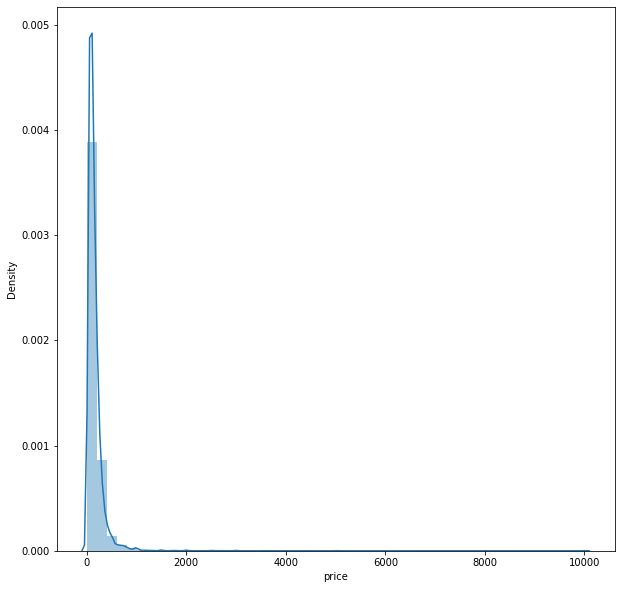

In [159]:
import seaborn as sns

plt.figure(figsize=(10,10))
sns.distplot(df7['price'])

**New York has 5 unique Borough and in the figure below, plotting the price against these borough for better understanding and visualization of the data.**

Bronx

Staten Island

Queens

Manhattan

Brooklyn



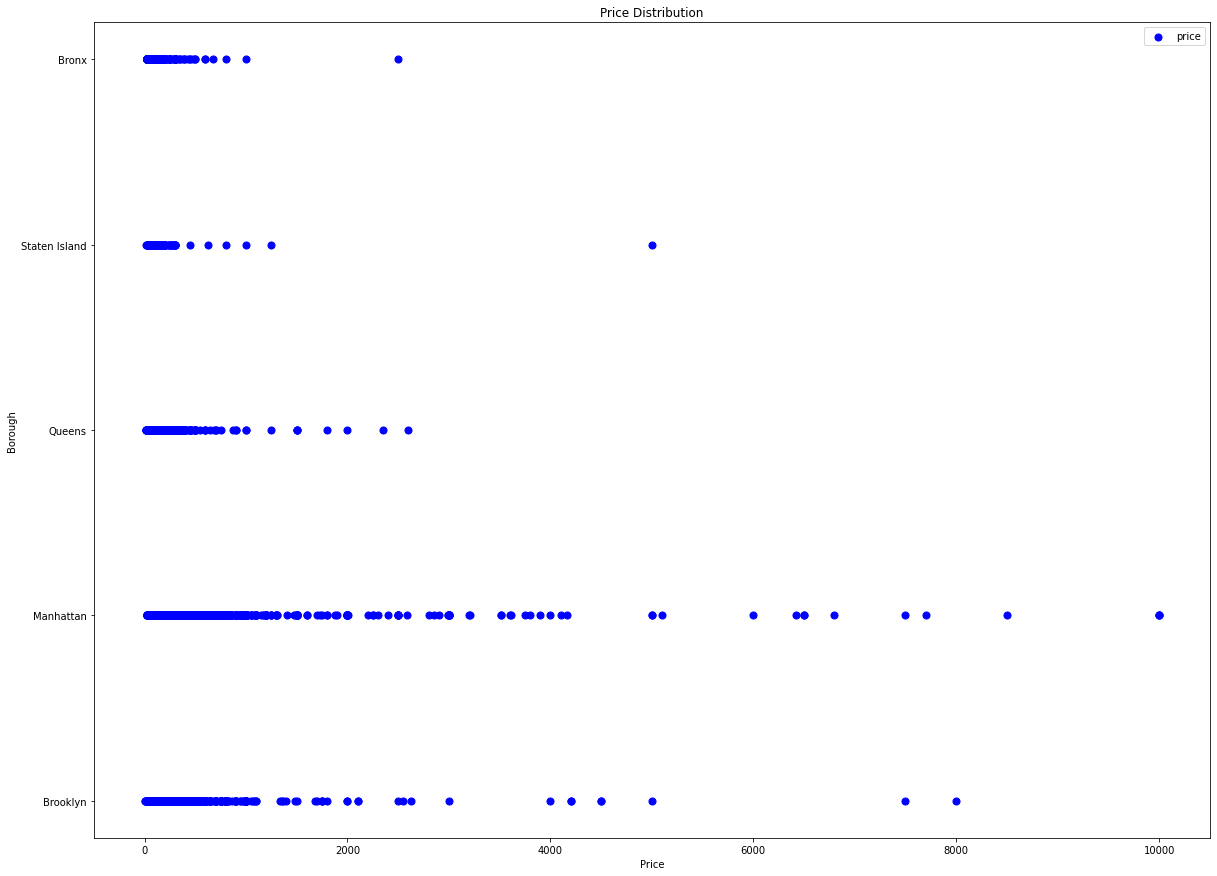

In [160]:
def plot_scatter_chart(df7):
    
    plt.rcParams['figure.figsize'] = (20,15)
    plt.scatter(df7.price,df7.borough,color='blue',label='price', s=50)
    plt.xlabel("Price")
    plt.ylabel("Borough")
    plt.title("Price Distribution")
    plt.legend()
    
plot_scatter_chart(df7)

**Displaying the different neighbourhood groups based on the latitude and longitude features provided in the datasets**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


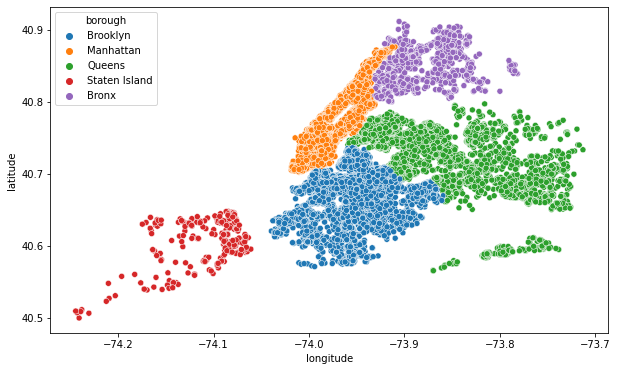

In [161]:
plt.figure(figsize=(10,6))
sns.scatterplot(df7.longitude,df7.latitude,hue=df7.borough)
plt.ioff()

In [162]:
df7.head(2)

,property_id,host_id,borough,latitude,longitude,room_type,price,min_nights,total_reviews,listings_count,days_available
0,2539,2787,Brooklyn,40.64749,-73.97237,Private room,149,1,9,6,365
1,2595,2845,Manhattan,40.75362,-73.98377,Entire home/apt,225,1,45,2,355


##**Applying Linear Regression from scikit learn on the number of nights the guest needs to book the property and calculating the coefficients**

In [163]:
from sklearn import linear_model
df_reg = linear_model.LinearRegression()
df_reg.fit(df7[['min_nights']], df7.price)
arr = df_reg.coef_
df_c1 = arr[0]
arr

array([0.42119024])

In [164]:
df_intercept = df_reg.intercept_
df_intercept

158.55975838881744

**Calculated the Coefficients and the intercept value**

**Predicting the price if the guest stays for 30 days**

In [165]:
df_reg.predict([[30]])

array([171.19546568])

**Plotting the Linear Regression prediction for the dataset**

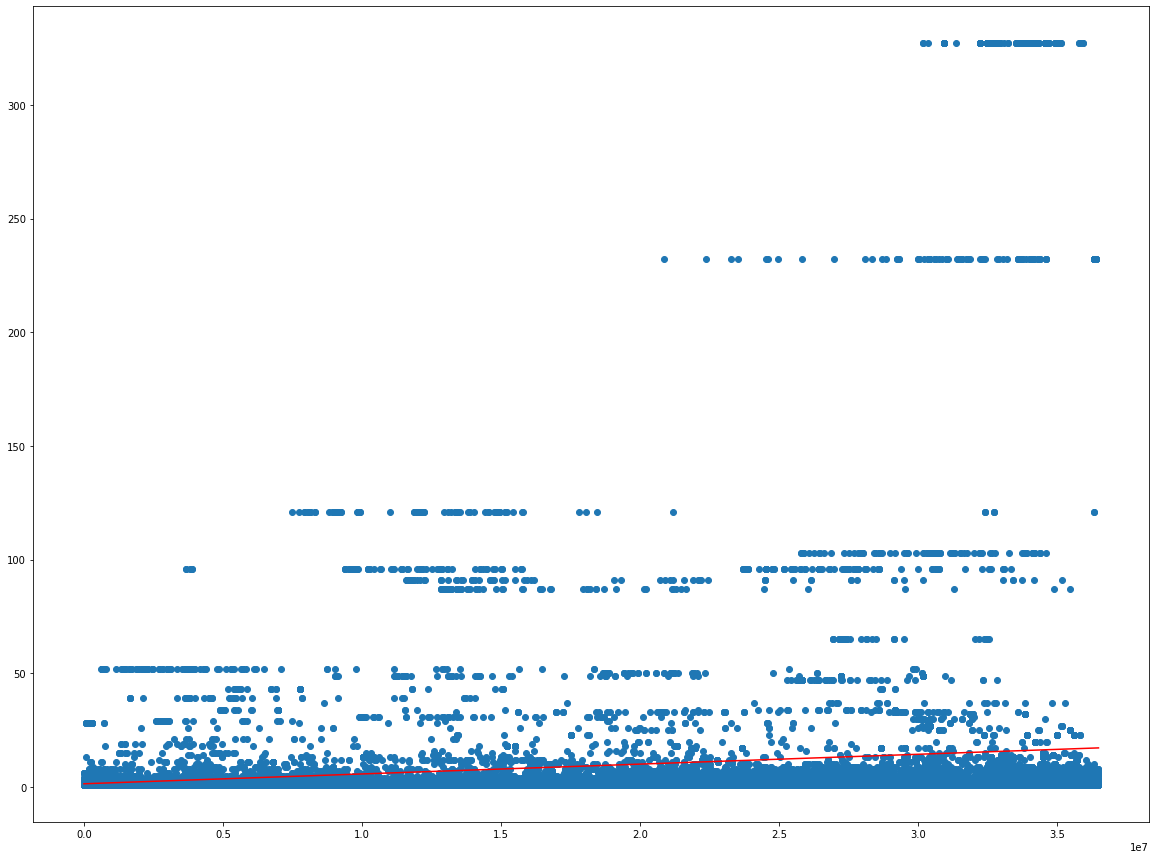

In [166]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler

X = df7.iloc[:, 0].values.reshape(-1, 1)  # values converts it into a numpy array
Y = df7.iloc[:, 9].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()

##**Conclusion**

We can conclude that as the number of stays increases, the price increases.

The type of room booked is directly proportional to the price.

The Borough is which the property is located also makes the difference in prices.